# Cats vs Dogs dataset

In [1]:
# Download and Inspect the Dataset
# THis is a .zip of 2000 JPG a subset of 'Dogs vs. Cats' dataset available on kaggle.
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-02-18 07:00:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 173.194.202.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.2’

cats_and_dogs_filte 100%[===================>]  65.43M   256MB/s    in 0.3s    

2023-02-18 07:00:59 (256 MB/s) - ‘cats_and_dogs_filtered.zip.2’ saved [68606236/68606236]



In [2]:
# Extracting to current directory
import zipfile
# Unzip
local_zip='./cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
# Observing the content of every directories.
import os 
# Base Directory
base_dir='cats_and_dogs_filtered'
print("content of base directory:")
print(os.listdir(base_dir))
# Train Directory
print("Contents of Train Directory:")
print(os.listdir(f'{base_dir}/train'))
# validation Directory
print("Contents of Validation Directory:")
print(os.listdir(f'{base_dir}/validation'))

content of base directory:
['validation', 'vectorize.py', 'train']
Contents of Train Directory:
['cats', 'dogs']
Contents of Validation Directory:
['cats', 'dogs']


In [4]:
# Assigning each directories to a variable.
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
# Directory with training cat and dog images.
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
# Directory with validation cat and dog images.
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')

In [5]:
# Files in the cats and dogs train directories
train_cats_fnames=os.listdir(train_cats_dir)
train_dogs_fnames=os.listdir(train_dogs_dir)
print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.660.jpg', 'cat.201.jpg', 'cat.270.jpg', 'cat.348.jpg', 'cat.615.jpg', 'cat.217.jpg', 'cat.185.jpg', 'cat.909.jpg', 'cat.458.jpg', 'cat.678.jpg']
['dog.555.jpg', 'dog.877.jpg', 'dog.664.jpg', 'dog.487.jpg', 'dog.946.jpg', 'dog.656.jpg', 'dog.986.jpg', 'dog.382.jpg', 'dog.720.jpg', 'dog.470.jpg']


In [6]:
# total numbers of cats and dog images in both validation and train Directories.
print("No. of train cats images:",len(train_cats_fnames))
print("No. of train dogs images:",len(train_dogs_fnames))
print("No. of validation cats images:",len(os.listdir(validation_cats_dir)))
print("No. of validation dogs images:",len(os.listdir(validation_dogs_dir)))

No. of train cats images: 1000
No. of train dogs images: 1000
No. of validation cats images: 500
No. of validation dogs images: 500


In [7]:
# Matplotlib parameters to look at the picture
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph(images in 4x4)
nrows=4
ncols=4
# Index for iterating over images
pic_index=0

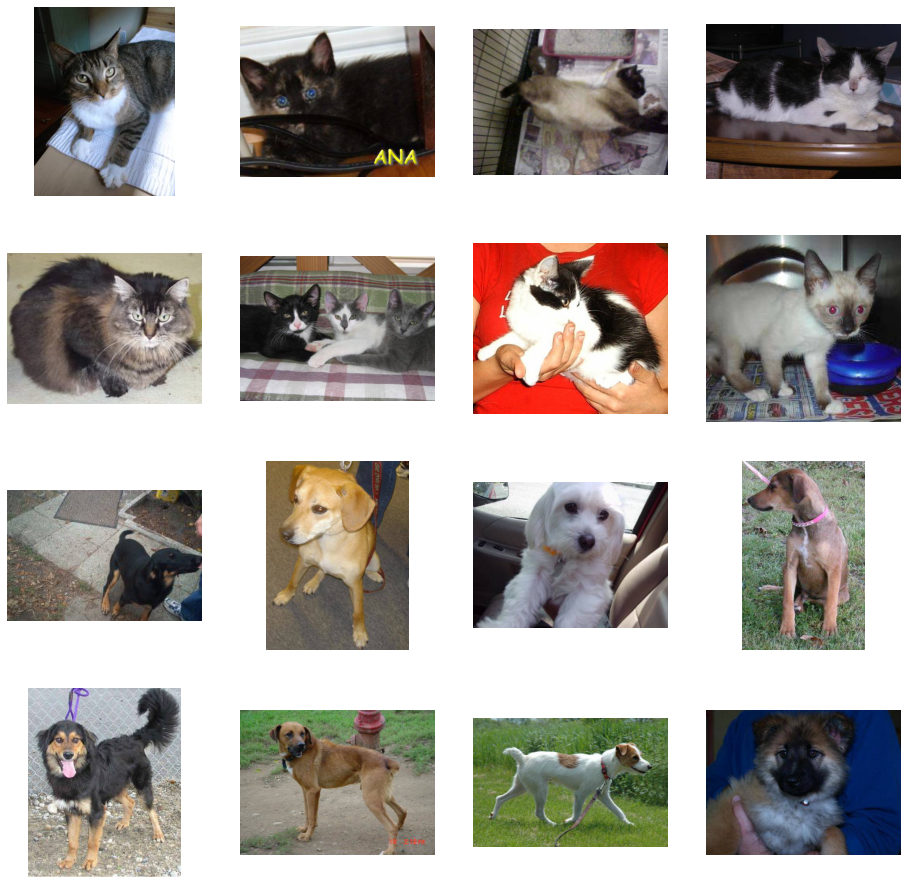

In [8]:
# Display 8 cats and 8 dogs images.
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index+=8
next_cat_pix=[os.path.join(train_cats_dir,fname)
              for fname in train_cats_fnames[pic_index-8:pic_index]]

next_dog_pix=[os.path.join(train_dogs_dir,fname)
              for fname in train_dogs_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [9]:
# Building a model
import tensorflow as tf
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [11]:
# Compile the model.
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [12]:
# Data Processing with ImageDataGenerator
# Normalize the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescaling
train_datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))
validation_generator=test_datagen.flow_from_directory(validation_dir,
                                                      batch_size=20,
                                                      class_mode='binary',
                                                      target_size=(150,150)
                                                  )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
# training images.
history=model.fit(train_generator,
                  epochs=15,
                  validation_data=validation_generator,
                  verbose=2)

Epoch 1/15
100/100 - 54s - loss: 0.7565 - accuracy: 0.5335 - val_loss: 0.6750 - val_accuracy: 0.6380 - 54s/epoch - 540ms/step
Epoch 2/15
100/100 - 43s - loss: 0.6624 - accuracy: 0.6170 - val_loss: 0.6398 - val_accuracy: 0.6270 - 43s/epoch - 428ms/step
Epoch 3/15
100/100 - 42s - loss: 0.5952 - accuracy: 0.6810 - val_loss: 0.6195 - val_accuracy: 0.6480 - 42s/epoch - 418ms/step
Epoch 4/15
100/100 - 47s - loss: 0.5415 - accuracy: 0.7345 - val_loss: 0.5540 - val_accuracy: 0.7330 - 47s/epoch - 469ms/step
Epoch 5/15
100/100 - 42s - loss: 0.5025 - accuracy: 0.7605 - val_loss: 0.5563 - val_accuracy: 0.7100 - 42s/epoch - 422ms/step
Epoch 6/15
100/100 - 41s - loss: 0.4519 - accuracy: 0.7885 - val_loss: 0.5438 - val_accuracy: 0.7320 - 41s/epoch - 414ms/step
Epoch 7/15
100/100 - 43s - loss: 0.4018 - accuracy: 0.8155 - val_loss: 0.5390 - val_accuracy: 0.7410 - 43s/epoch - 425ms/step
Epoch 8/15
100/100 - 42s - loss: 0.3206 - accuracy: 0.8655 - val_loss: 0.5659 - val_accuracy: 0.7190 - 42s/epoch - 419

In [14]:
# Model Prediction 
import numpy as np

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving download.jpg to download.jpg
1/1 [==============================] - 0s 124ms/step
[0.08827183]
download.jpg is a cat


Text(0.5, 1.0, 'Training and validation loss')

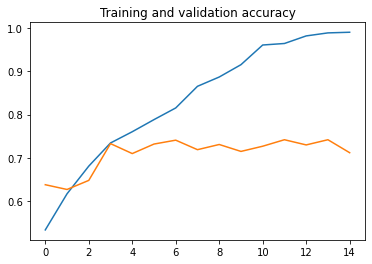

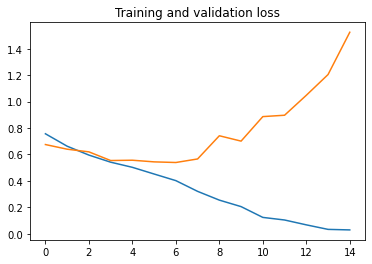

In [15]:
# Evaluating Accuracy and Loss for the Model.
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

we can clearly the see the model overfits the training datasets.